In [0]:
#Импорт библиотек 
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks") 

In [0]:
#Монтирую гугл диск, чтобы взять оттуда датасет
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [0]:
#Загружаю данные с гугл диска
data = pd.read_csv('/content/gdrive/My Drive/toy_dataset.csv', sep=",")


In [0]:
data.head(10)

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No
5,6,Dallas,Female,36,50786.0,No
6,7,Dallas,Female,32,33155.0,No
7,8,Dallas,Male,39,30914.0,No
8,9,Dallas,Male,51,68667.0,No
9,10,Dallas,Female,30,50082.0,No


In [0]:
data.shape

(150000, 6)

In [0]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))
#data.columns
#data.dtypes
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Всего строк: 150000
Number - 0
City - 0
Gender - 0
Age - 0
Income - 0
Illness - 0


In [0]:
#Различные метрики по моим данным
data.describe()

,Number,Age,Income
count,150000.000000,150000.000000,150000.000000
mean,75000.500000,44.950200,91252.798273
std,43301.414527,11.572486,24989.500948
min,1.000000,25.000000,-654.000000
25%,37500.750000,35.000000,80867.750000
50%,75000.500000,45.000000,93655.000000
75%,112500.250000,55.000000,104519.000000
max,150000.000000,65.000000,177157.000000


In [0]:
#Типы данных значений датасета
data.dtypes

Number       int64
City        object
Gender      object
Age          int64
Income     float64
Illness     object
dtype: object

In [0]:
print(data['Illness'].unique().size)
data['Illness'].unique()

2


array(['No', 'Yes'], dtype=object)

In [0]:
from sklearn.preprocessing import  LabelEncoder

In [0]:
le = LabelEncoder()
data['Illness'] = le.fit_transform(data[['Illness']])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
data.head(10)

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,0
1,2,Dallas,Male,54,45084.0,0
2,3,Dallas,Male,42,52483.0,0
3,4,Dallas,Male,40,40941.0,0
4,5,Dallas,Male,46,50289.0,0
5,6,Dallas,Female,36,50786.0,0
6,7,Dallas,Female,32,33155.0,0
7,8,Dallas,Male,39,30914.0,0
8,9,Dallas,Male,51,68667.0,0
9,10,Dallas,Female,30,50082.0,0


In [0]:
data.corr()['Illness'].abs().sort_values(ascending=False)

Illness    1.000000
Number     0.003138
Age        0.001811
Income     0.000298
Name: Illness, dtype: float64

In [0]:
data.corr()

,Number,Age,Income,Illness
Number,1.000000,-0.003448,0.410460,0.003138
Age,-0.003448,1.000000,-0.001318,0.001811
Income,0.410460,-0.001318,1.000000,0.000298
Illness,0.003138,0.001811,0.000298,1.000000


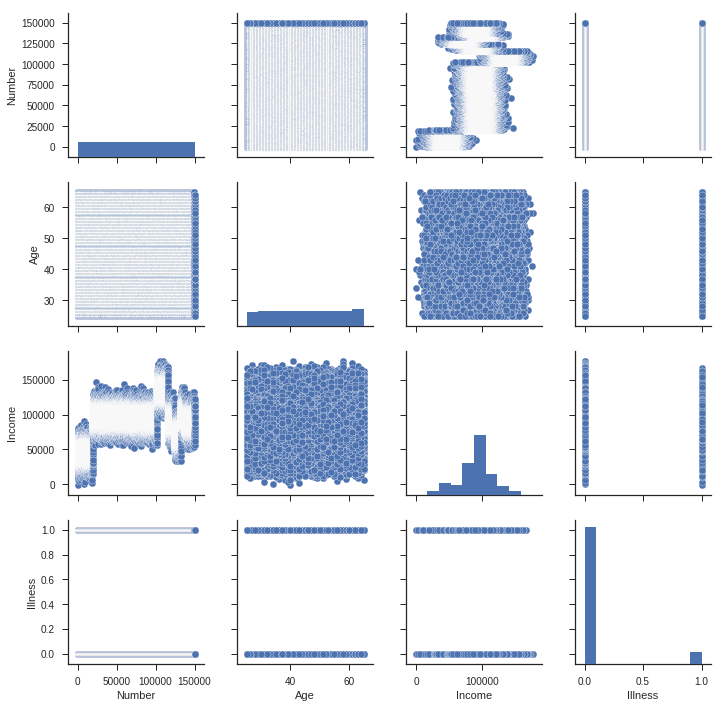

In [0]:
sns.pairplot(data)


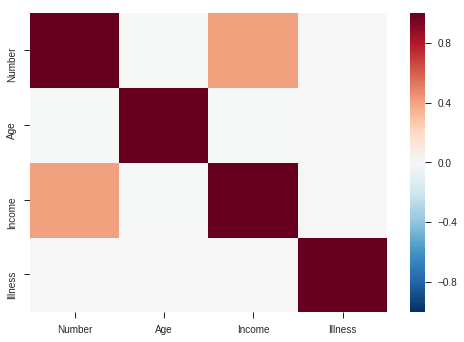

In [0]:
sns.heatmap(data.corr())


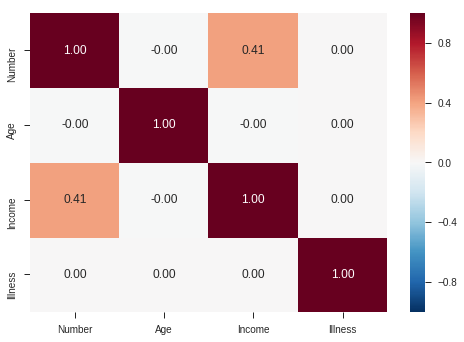

In [0]:
sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.2f')
